After review every features and also combines with some of my own opinions, this notebook is mainly upon the following extrodinary work.  https://www.kaggle.com/code/sorkun/house-prices-feature-engineering-lb-0-11775

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import skew

from sklearn.linear_model import Ridge, ElasticNet,  Lasso,LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xg

from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor



In [109]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

data_b = data.drop(['Id'], axis=1)
test_b = test.drop(['Id'], axis=1)

data_b.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## analyze the feature

In [48]:

def analyse_feature(feature_name):
    #show the relation between y and feature
    #jointplot = x&y hist+ x&y scatter
    sns.jointplot(data = data_b, y='SalePrice', x = feature_name)
    plt.show()
    
    print('\n****INFO****')
    print(data_b[feature_name].describe())
    print('\n****VALUE COUNTS****')
    print(data_b[feature_name].value_counts())
    print('\n****VALUE ACG SALE PRICE****')
    print(data_b.groupby(feature_name)['SalePrice'].mean())
    #if feature is not object, so is int or float
    if data_b[feature_name].dtype != 'O':
        print('\nSKEWNESS:', str(skew(data_b[feature_name])))
        
        
    print('\n****TEST INFO****')
    print(test_b[feature_name].describe())
    print('\n****VALUE COUNTS****')
    print(test_b[feature_name].value_counts())    
    
    #
    print('\nOnly in train: ',set(data_b[feature_name]) - set(test_b[feature_name]) )
    print('\nOnly in test: ',set(test_b[feature_name]) - set(data_b[feature_name]) )

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

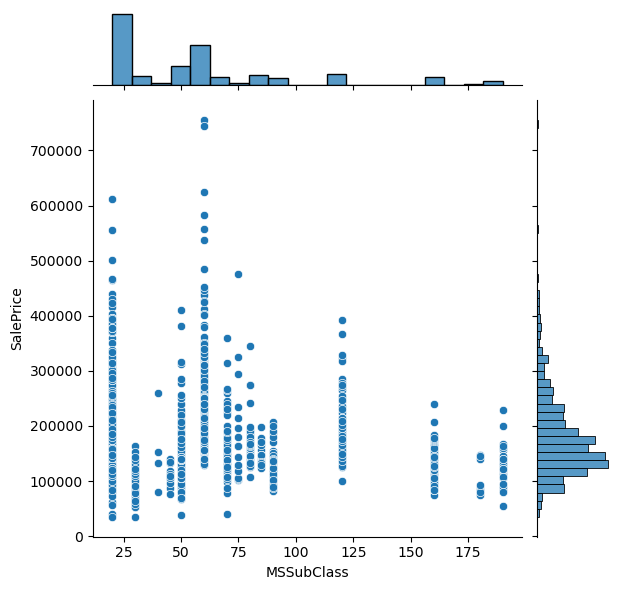


****INFO****
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

****VALUE COUNTS****
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

****VALUE ACG SALE PRICE****
MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64

SKEWNESS: 1.4062101115313512

****TEST INFO****
count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75% 

In [6]:
analyse_feature('MSSubClass')

BsmtQual
BsmtCond
BsmtExposure
FireplaceQu
GarageQual
GarageCond
Fence

ordinal category, fill na with -1

In [62]:
#fill na
#utilities almost has only one kind category
#for some feature  0 equal to none nan
data_b['LotFrontage']=data_b['LotFrontage'].fillna(70) #mean
test_b['LotFrontage']=test_b['LotFrontage'].fillna(70) 
test_b['MSZoning']=test_b['MSZoning'].fillna("C (all)") 
test_b['GarageCars']=test_b['GarageCars'].fillna(0) 
test_b['GarageArea']=test_b['GarageArea'].fillna(0) 
test_b['Functional']=test_b['Functional'].fillna("Typ") 
test_b['SaleType']=test_b['SaleType'].fillna("WD") 
test_b['SaleCondition']=test_b['SaleCondition'].fillna("Normal")
data_b['Fence']=data_b['Fence'].fillna(-1) 
test_b['Fence']=test_b['Fence'].fillna(-1) 
data_b['Electrical'] = data_b['Electrical'].fillna("SBrkr")
data_b['FireplaceQu'] = data_b['FireplaceQu'].fillna(-1)
test_b['FireplaceQu'] = test_b['FireplaceQu'].fillna(-1)
data_b['GarageType'] = data_b['GarageType'].fillna("None")
test_b['GarageType'] = test_b['GarageType'].fillna("None")
data_b['GarageQual'] = data_b['GarageQual'].fillna(-1)
test_b['GarageQual'] = test_b['GarageQual'].fillna(-1)
data_b['GarageCond'] = data_b['GarageCond'].fillna(-1)
test_b['GarageCond'] = test_b['GarageCond'].fillna(-1)
data_b['GarageFinish'] = data_b['GarageFinish'].fillna("None")
test_b['GarageFinish'] = test_b['GarageFinish'].fillna("None")
test_b['Exterior1st'] = test_b['Exterior1st'].fillna("VinylSd")
test_b['Exterior2nd']= test_b['Exterior2nd'].fillna("VinylSd")
data_b['MasVnrType'] = data_b['MasVnrType'].fillna("None")
test_b['MasVnrType'] = test_b['MasVnrType'].fillna("None")
data_b['MasVnrArea'] = data_b['MasVnrArea'].fillna(0)
test_b['MasVnrArea'] = test_b['MasVnrArea'].fillna(0)
test_b['BsmtHalfBath']=test_b['BsmtHalfBath'].fillna(0) 
test_b['BsmtFullBath']=test_b['BsmtFullBath'].fillna(0) 
test_b['KitchenQual']=test_b['KitchenQual'].fillna("Gd") 
test_b['TotalBsmtSF']=test_b['TotalBsmtSF'].fillna(0) 
test_b['BsmtUnfSF']=test_b['BsmtUnfSF'].fillna(0)
test_b['BsmtFinSF1']=test_b['BsmtFinSF1'].fillna(0) 
test_b['BsmtFinSF2']= test_b['BsmtFinSF2'].fillna(0) 
test_b['BsmtQual']=test_b['BsmtQual'].fillna(-1) 
data_b['BsmtQual']=data_b['BsmtQual'].fillna(-1)
test_b['BsmtCond']= test_b['BsmtCond'].fillna(-1)
data_b['BsmtCond']= data_b['BsmtCond'].fillna(-1)
test_b['BsmtExposure']= test_b['BsmtExposure'].fillna(-1) 
data_b['BsmtExposure']= data_b['BsmtExposure'].fillna(-1) 
test_b['Utilities']= test_b['Utilities'].fillna("AllPub") 
data_b['GarageYrBlt'] = data_b['GarageYrBlt'].fillna(1895)
test_b['GarageYrBlt'] = test_b['GarageYrBlt'].fillna(1895)


In [63]:
#fix outliers
#lotfrontage, use same value of other observation with same lot area

test_b.loc[test.GarageYrBlt==2207,'GarageYrBlt'] = 2007 
test_b.loc[test_b.LotArea==1533,'LotFrontage'] = 21 
data_b.loc[data_b.LotArea>40000,'LotArea'] = 40000
test_b.loc[test_b.LotArea>40000,'LotArea'] = 40000
data_b.loc[data_b.LotFrontage>150,'LotFrontage'] = 150
test_b.loc[test_b.LotFrontage>150,'LotFrontage'] = 150
data_b.loc[data_b["1stFlrSF"]>3000,'1stFlrSF'] = 3000
test_b.loc[test_b["1stFlrSF"]>3000,'1stFlrSF'] = 3000
data_b.loc[data_b["GrLivArea"]>4000,'GrLivArea'] = 4000
test_b.loc[test_b["GrLivArea"]>4000,'GrLivArea'] = 4000
data_b.loc[data_b["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
test_b.loc[test_b["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
data_b.loc[data_b["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
test_b.loc[test_b["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
data_b.loc[data_b["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
test_b.loc[test_b["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
data_b.loc[data_b["GarageCars"]>3,'GarageCars'] = 3
test_b.loc[test_b["GarageCars"]>3,'GarageCars'] = 3
data_b.loc[data_b["GarageArea"]>1000,'GarageArea'] = 1000
test_b.loc[test_b["GarageArea"]>1000,'GarageArea'] = 1000

In [64]:

#Feature Extraction (Converting Years to Ages)
data_b["Age"] = 2011 - data_b["YearBuilt"]
test_b["Age"] = 2011 - test_b["YearBuilt"]

data_b["RemodAfter"] = data_b["YearRemodAdd"] - data_b["YearBuilt"]
data_b["AgeRemodAdd"] = 2011 - data_b["YearRemodAdd"]

test_b["RemodAfter"] = test_b["YearRemodAdd"] - test_b["YearBuilt"]
test_b.loc[test_b.RemodAfter<0,'RemodAfter'] = 0
test_b["AgeRemodAdd"] = 2011 - test_b["YearRemodAdd"]

data_b["Age_Sold"] = data_b["YrSold"] - data_b["YearBuilt"] 
test_b["Age_Sold"] = test_b["YrSold"] - test_b["YearBuilt"]
test_b.loc[test_b.Age_Sold<0,'Age_Sold'] = 0

data_b["Sold_before"] = 2011 - data_b["YrSold"]
test_b["Sold_before"] = 2011 - test_b["YrSold"] 

data_b['Age_Garage'] = 2011 - data_b['GarageYrBlt']
test_b['Age_Garage'] = 2011 - test_b['GarageYrBlt']
data_b['Age_Garage_Sold'] = data_b["YrSold"] - data_b['GarageYrBlt']
test_b['Age_Garage_Sold'] = test_b["YrSold"] - test_b['GarageYrBlt']

data_b['TotalPorch']=data_b['EnclosedPorch'] + data_b['OpenPorchSF'] + data_b['ScreenPorch'] + data_b['3SsnPorch'] 
test_b['TotalPorch']=test_b['EnclosedPorch'] + test_b['OpenPorchSF'] + test_b['ScreenPorch'] + test_b['3SsnPorch'] 

data_b['TotalBath'] = data_b['FullBath']+ data_b['HalfBath']+ data_b['BsmtFullBath']+ data_b['BsmtHalfBath']
test_b['TotalBath'] = test_b['FullBath']+ test_b['HalfBath']+ test_b['BsmtFullBath']+ test_b['BsmtHalfBath']
    

In [65]:
#Update some values that is not exist one of two datasets
test_b['MSSubClass'] = test_b['MSSubClass'].replace(["150"], ["160"])
data_b['HouseStyle'] = data_b['HouseStyle'].replace(["2.5Fin"], ["2Story"])
data_b['Exterior1st'] = data_b['Exterior1st'].replace(['Stone', 'ImStucc'],['CemntBd', 'Stucco'])
data_b['Electrical'] = data_b['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
test_b['Electrical'] = test_b['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
test_b['BsmtCond'] = test_b['BsmtCond'].replace(["Ex"], ["Gd"])
# data_b['BsmtCond'] = data_b['BsmtCond'].replace(["Po"], ["None"])
data_b['GarageQual'] = data_b['GarageQual'].replace(["Ex"], ["Gd"])
data_b['GarageCond'] = data_b['GarageCond'].replace(["Ex"], ["Gd"])
test_b['GarageCond'] = test_b['GarageCond'].replace(["Ex"], ["Gd"])

In [66]:
#turn categorical feature to ordinal feature
def ordinal_cate(df):
    conv_dict1 = {
        "Ex":0,
        "Gd":1,
        "TA":2,
        "Fa":3,
        "Po":4            
    }


    cat_type1 = ['ExterQual',
     'ExterCond',
     'BsmtQual',
     'BsmtCond',
    'HeatingQC','KitchenQual','FireplaceQu',
     'GarageQual',
     'GarageCond','PoolQC','BsmtExposure']

    for i in cat_type1:
        df[i].replace(conv_dict1,inplace = True)


    conv_dict2 = {
        "Gd":0,
        "Av":1,
        "Mn":2,
        "No":3
    }
    cat_type2 = ['BsmtExposure']

    for i in cat_type2:
        df[i].replace(conv_dict2,inplace = True)

    conv_dict3 = {
        "GLQ":0,
        "ALQ":1,
        "BLQ":2,
        "Rec":3,
        "LwQ":4,
        "Unf":5

    }
    cat_type3 = ['BsmtFinType1','BsmtFinType2']

    for i in cat_type3:
        df[i].replace(conv_dict3,inplace = True)

    conv_dict4 = {
        "Y":1,
        "N":0

    }
    cat_type4 = ['CentralAir']

    for i in cat_type4:
        df[i].replace(conv_dict4,inplace = True)

    conv_dict5 = {
        "SBrkr":0,
        "FuseA":1,
        "FuseF":2,
        "FuseP":3,
        "Mix":4      
    }

    df['Electrical'].replace(conv_dict5,inplace = True)

    conv_dict6 = {
        "Typ":0,
        "Min1":1,
        "Min2":2,
        "Mod":3,
        "Maj1":4,
        "Maj2":5,
        "Sev":6,
        "Sal":7
    }

    df['Functional'].replace(conv_dict6,inplace = True)

    conv_dict7 = {
        "Y":0,
        "P":1,
        "N":2
    }

    df['PavedDrive'].replace(conv_dict7,inplace = True)

    conv_dict8 = {
        "GdPrv":0,
        "MnPrv":1,
        "GdWo":2,
        "MnWw":3
    }

    df['Fence'].replace(conv_dict8,inplace = True)
    
    return df


In [67]:
data_b = ordinal_cate(data_b)
test_b = ordinal_cate(test_b)

In [68]:
# pop：从dataframe中去掉saleprice
y = data_b.pop("SalePrice")

In [69]:
# Check Missing values from training set
data_b.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
BsmtFinType2      38
BsmtFinType1      37
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64

In [70]:
# Check Missing values from test set
test_b.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1456
MiscFeature     1408
Alley           1352
BsmtFinType2      42
BsmtFinType1      42
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64

In [71]:
#Drop Missing Columns
data_b = data_b.dropna(axis=1) 
test_b = test_b.dropna(axis=1)

#AFTER ANALYSING EACH COLUMN ->  Drop insignificant columns
data_b = data_b.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1) 
test_b = test_b.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1) 

## one hot encoding

In [103]:
cols = data_b.columns
categorical_columns = data_b.select_dtypes('object').columns
categorical_columns = categorical_columns.insert(0,'MSSubClass') # mssubclass is not numerical feature
numeric_columns = data_b.select_dtypes(['int','float']).columns


category_analysis = pd.DataFrame(categorical_columns, columns = ['Feature'])
unique_values = []
unique_counts = []

for i in categorical_columns:
    unique_values.append(data_b[i].unique())
    unique_counts.append(len(data_b[i].unique()))

category_analysis["Categories"] = unique_values
category_analysis["Number"] = unique_counts
category_analysis

,Feature,Categories,Number
0,MSSubClass,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15
1,MSZoning,"[RL, RM, C (all), FV, RH]",5
2,LotShape,"[Reg, IR1, IR2, IR3]",4
3,LandContour,"[Lvl, Bnk, Low, HLS]",4
4,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
5,LandSlope,"[Gtl, Mod, Sev]",3
6,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25
7,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9
8,BldgType,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",5
9,HouseStyle,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",7


In [104]:
#convert categorical variables into one hot encode

data_b = pd.get_dummies(data_b)
test_b = pd.get_dummies(test_b)

## log level transform

In [105]:
#?
skewed_feats = data_b.apply(lambda x:skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features top10: \n")
skewness = pd.DataFrame({'Skew':skewed_feats})
print(skewness.head(10))

data_b_skewed = data_b.copy()
test_b_skewed = test_b.copy()

print("\n")
print("There are {} skewed numerical features to Log1p transform.".format(skewness.shape[0]))

skewed_features = skewness.index

for feat in skewed_features:
    data_b_skewed[feat] = np.log1p(data_b_skewed[feat])
    test_b_skewed[feat] = np.log1p(test_b_skewed[feat])


Skew in numerical features top10: 

                            Skew
Exterior1st_CBlock     38.170678
Exterior1st_AsphShn    38.170678
RoofStyle_Shed         26.962963
Exterior1st_BrkComm    26.962963
SaleType_Con           26.962963
Neighborhood_Blueste   26.962963
Condition1_RRNe        26.962963
SaleType_Oth           21.992470
Foundation_Wood        21.992470
SaleCondition_AdjLand  19.026370


There are 170 skewed numerical features to Log1p transform.


C:\Users\YOITE\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [106]:
print('\n Only in train:', set(data_b_skewed.columns) - set(test_b_skewed.columns))
print('\n Only in train:', set(test_b_skewed.columns) - set(data_b_skewed.columns))


 Only in train: set()

 Only in train: set()


In [117]:
y_log = np.log1p(y)
test_b_skewed=test_b_skewed.replace(-np.Inf, 0)
data_b_skewed=data_b_skewed.replace(-np.Inf, 0)

## train model

In [119]:
#run cross validation for each models

def run_cvs(X,y):
    
    baseline = ElasticNet(random_state=0,max_iter=10e7,alpha=0.0003)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("ENet avg:",np.mean(baseline_score))
    
    baseline = Ridge(alpha = 1, random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("Ridge avg:",np.mean(baseline_score))   
    
    baseline = Lasso(alpha = 0.0001,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("Lasso avg:",np.mean(baseline_score))
    
    baseline = KernelRidge(alpha=0.1)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("KRR avg:",np.mean(baseline_score))

    baseline = lgb.LGBMRegressor(learning_rate=0.01,num_leaves=4,n_estimators=2000, random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("LGBM avg:",np.mean(baseline_score))

    baseline = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("XGB avg:",np.mean(baseline_score))
    
    baseline = CatBoostRegressor(random_state=0,verbose=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("CatB avg:",np.mean(baseline_score))

    baseline = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,max_depth=4, max_features='sqrt',
                min_samples_leaf=15, min_samples_split=50,loss='huber', random_state = 0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("GBR avg:",np.mean(baseline_score))
    
run_cvs(data_b_skewed,y_log) 

ENet avg: 0.9070537906979098
Ridge avg: 0.9031680772937334
Lasso avg: 0.9049983241442762
KRR avg: 0.8936531355774957
LGBM avg: 0.8998801576101624
XGB avg: 0.9115870043687859
CatB avg: 0.913895983862899
GBR avg: 0.907492297449703


In [121]:
#Combine 4 models (2 tree-based AND 2 linear Models) 
def make_submission(X_train, y_train, X_test):    
    sub_df = pd.read_csv('./sample_submission.csv', index_col = "Id")
    
    ridge = Ridge(alpha = 1, random_state=0).fit(X_train,y_train)
    ridge_preds_log=ridge.predict(X_test)
    
    lasso = Lasso(alpha = 0.0001,random_state=0).fit(X_train,y_train)
    lasso_preds_log=lasso.predict(X_test)

    catB = CatBoostRegressor(random_state=0,verbose=0).fit(X_train,y_train)
    catB_preds_log=catB.predict(X_test)

    xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0).fit(X_train,y_train)
    xgb_preds_log=xgb.predict(X_test)
    
    catb_xbr_lasso_ridge_mean_preds_log=(catB_preds_log+ridge_preds_log+lasso_preds_log+xgb_preds_log)/4
    sub_df['SalePrice'] = np.exp(catb_xbr_lasso_ridge_mean_preds_log)-1
    sub_df.to_csv("submission.csv")
    
make_submission(data_b_skewed,y_log,test_b_skewed)    